In [1]:
library(CellChat)
library(patchwork)
library(magrittr)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



# Loading CellChat objects

After running the main CellChat workflow separately for each condition, we use the resulting objects for doing pairwise comparisons of the conditions.

In [2]:
condition1 <- readRDS("cellchat_normal.rds")

In [3]:
condition2 <- readRDS("cellchat_tumor.rds")

# Running CellChat comparisons

In this demo you will see the most important analyses for comparing multiple conditions. However, more types of comparisons can be found in the official documentation of CellChat: 

https://htmlpreview.github.io/?https://github.com/sqjin/CellChat/blob/master/tutorial/Comparison_analysis_of_multiple_datasets.html

### Merging separate CellChat objects

The first step is merge all CellChat objects to compare

In [4]:
object.list <- list(Normal = condition1, Tumor = condition2)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



### Comparing overall strength of interaction

Number of interactions/weights

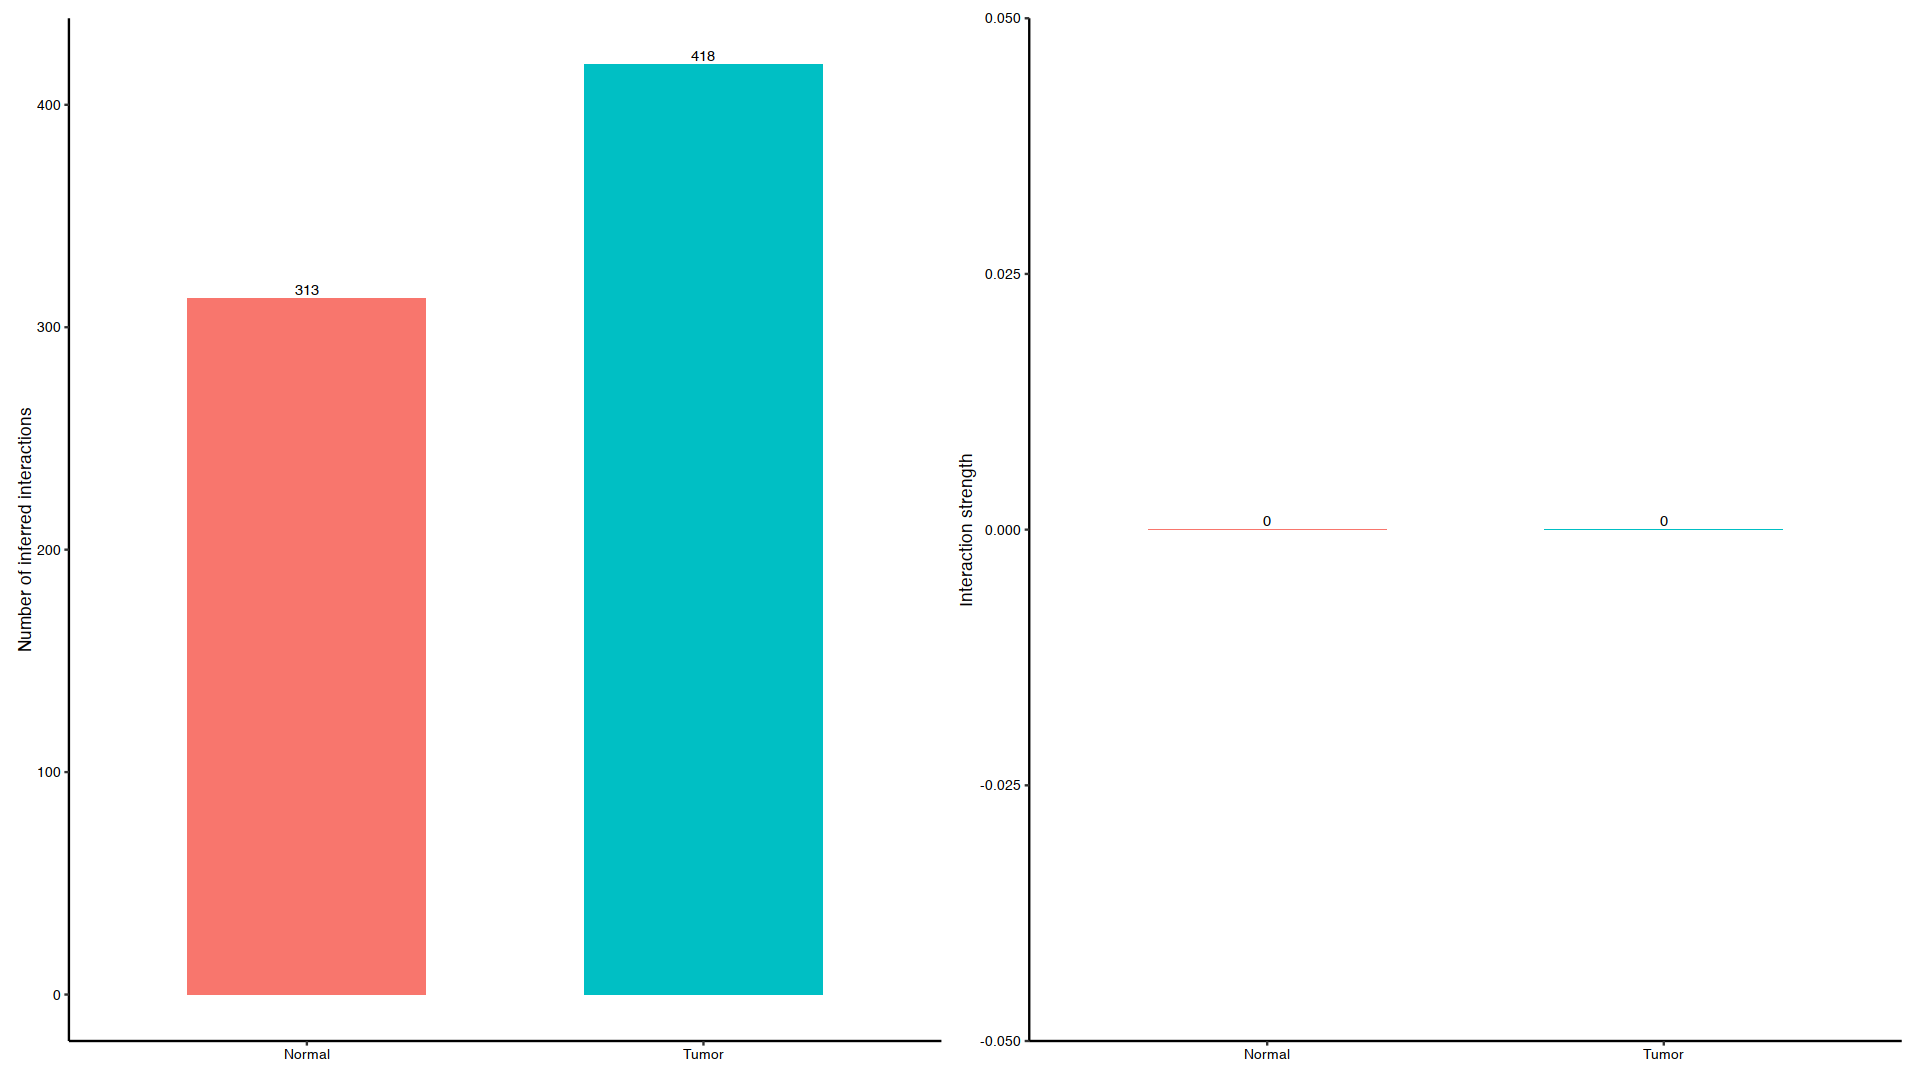

In [5]:
options(repr.plot.height = 9, repr.plot.width = 16)
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2

Differential interaction: 
- <font color="red">Up-regulated in condition 2 vs condition 1</font>
- <font color="blue">Down-regulated in condition 2 vs condition 1</font>

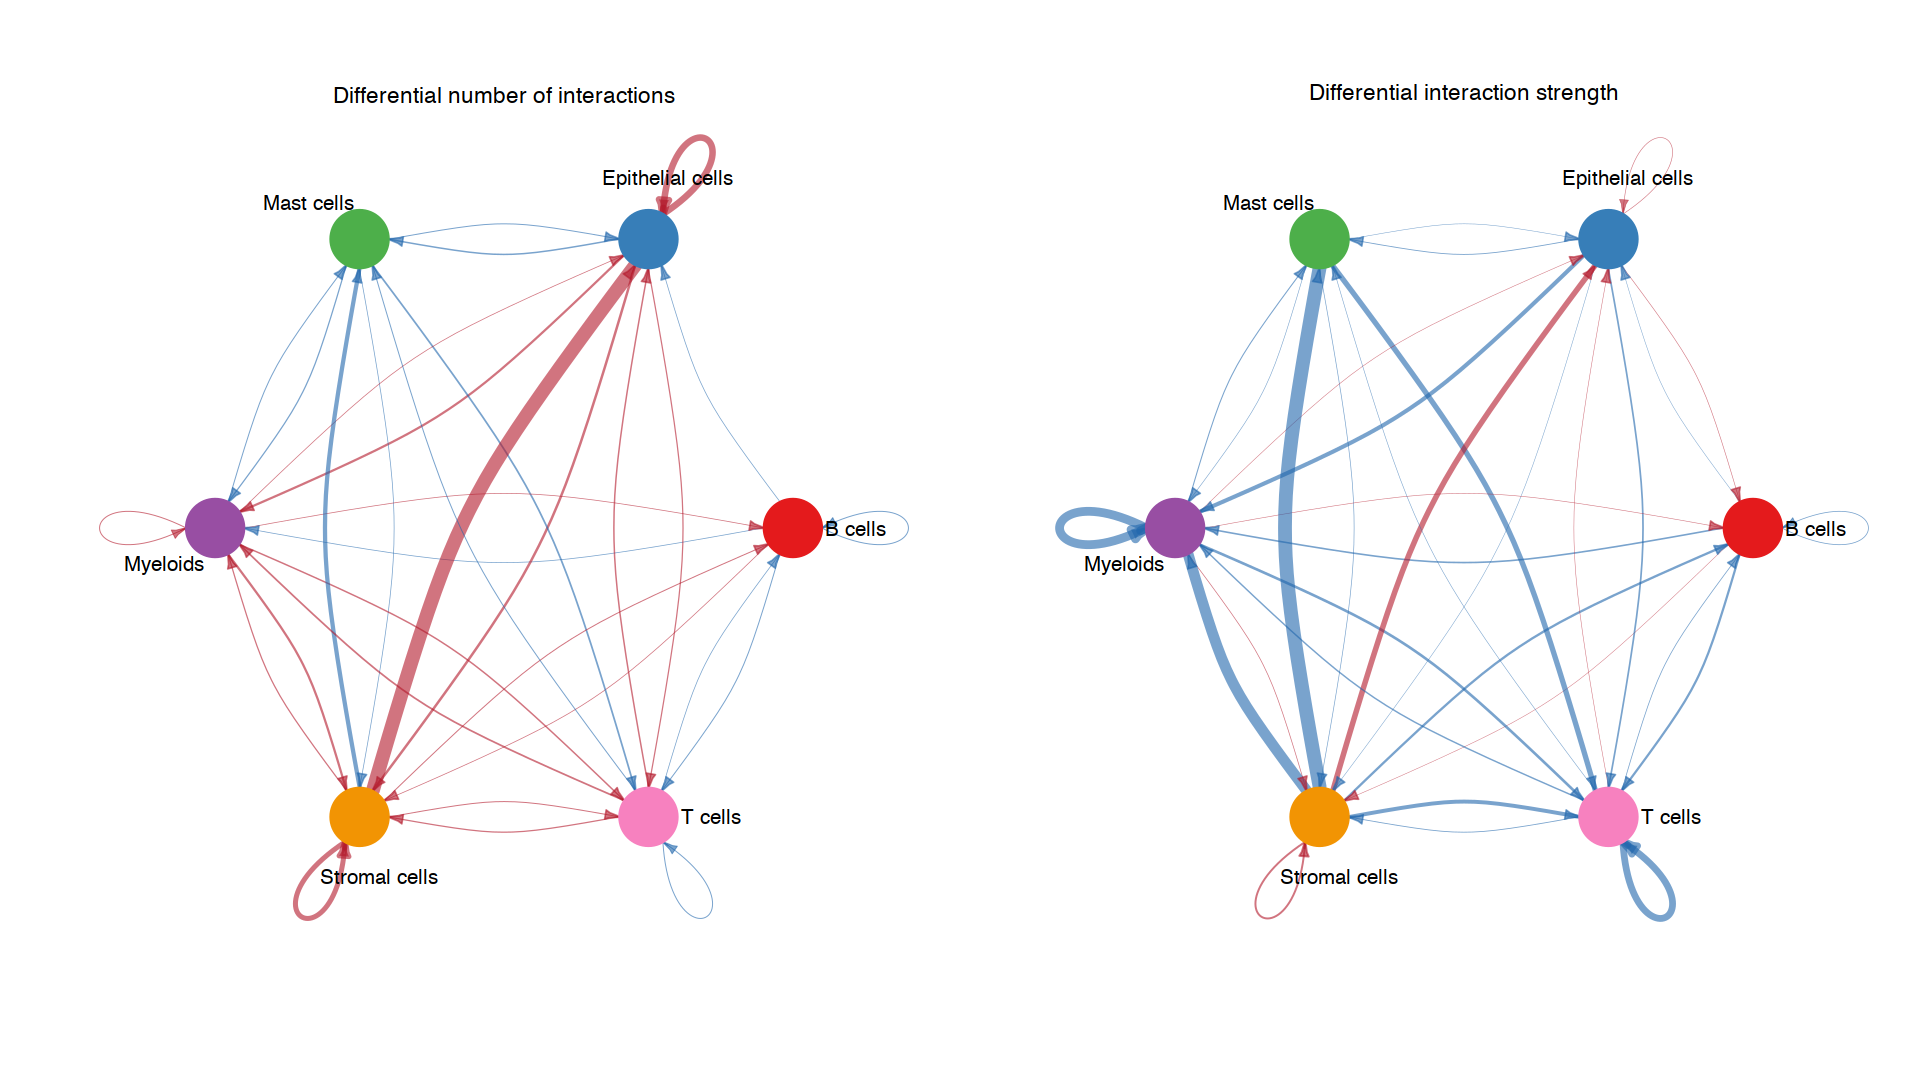

In [6]:
options(repr.plot.height = 9, repr.plot.width = 16)
par(mfrow = c(1,2), xpd=TRUE)
p1 <- netVisual_diffInteraction(cellchat, weight.scale = T)
p2 <- netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight")

Differential interaction (Heatmaps)

Do heatmap based on a merged object 


Do heatmap based on a merged object 




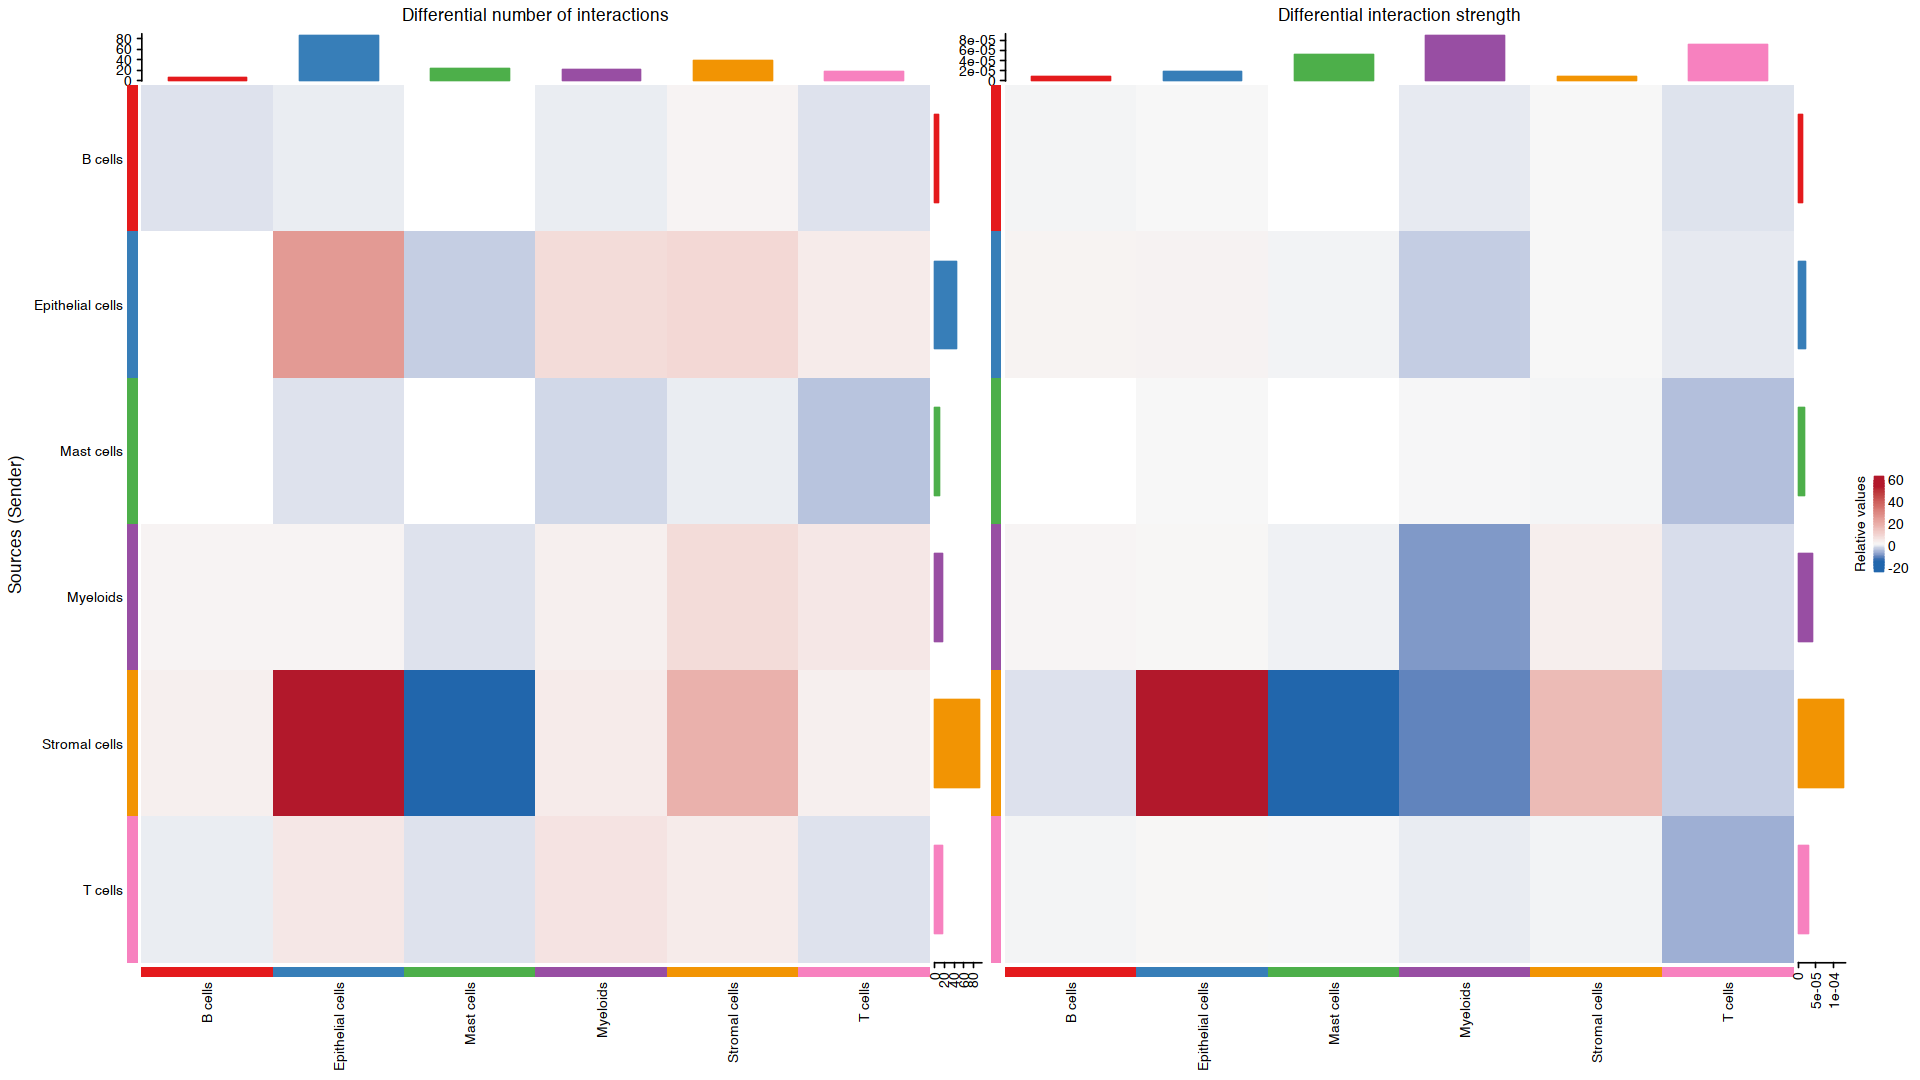

In [7]:
options(repr.plot.height = 9, repr.plot.width = 16)
gg1 <- netVisual_heatmap(cellchat)
#> Do heatmap based on a merged object
gg2 <- netVisual_heatmap(cellchat, measure = "weight")
#> Do heatmap based on a merged object
gg1 + gg2

Compare number of interactions in multiple datasets, normalizing the size of the nodes/edges by the maximum across datasets

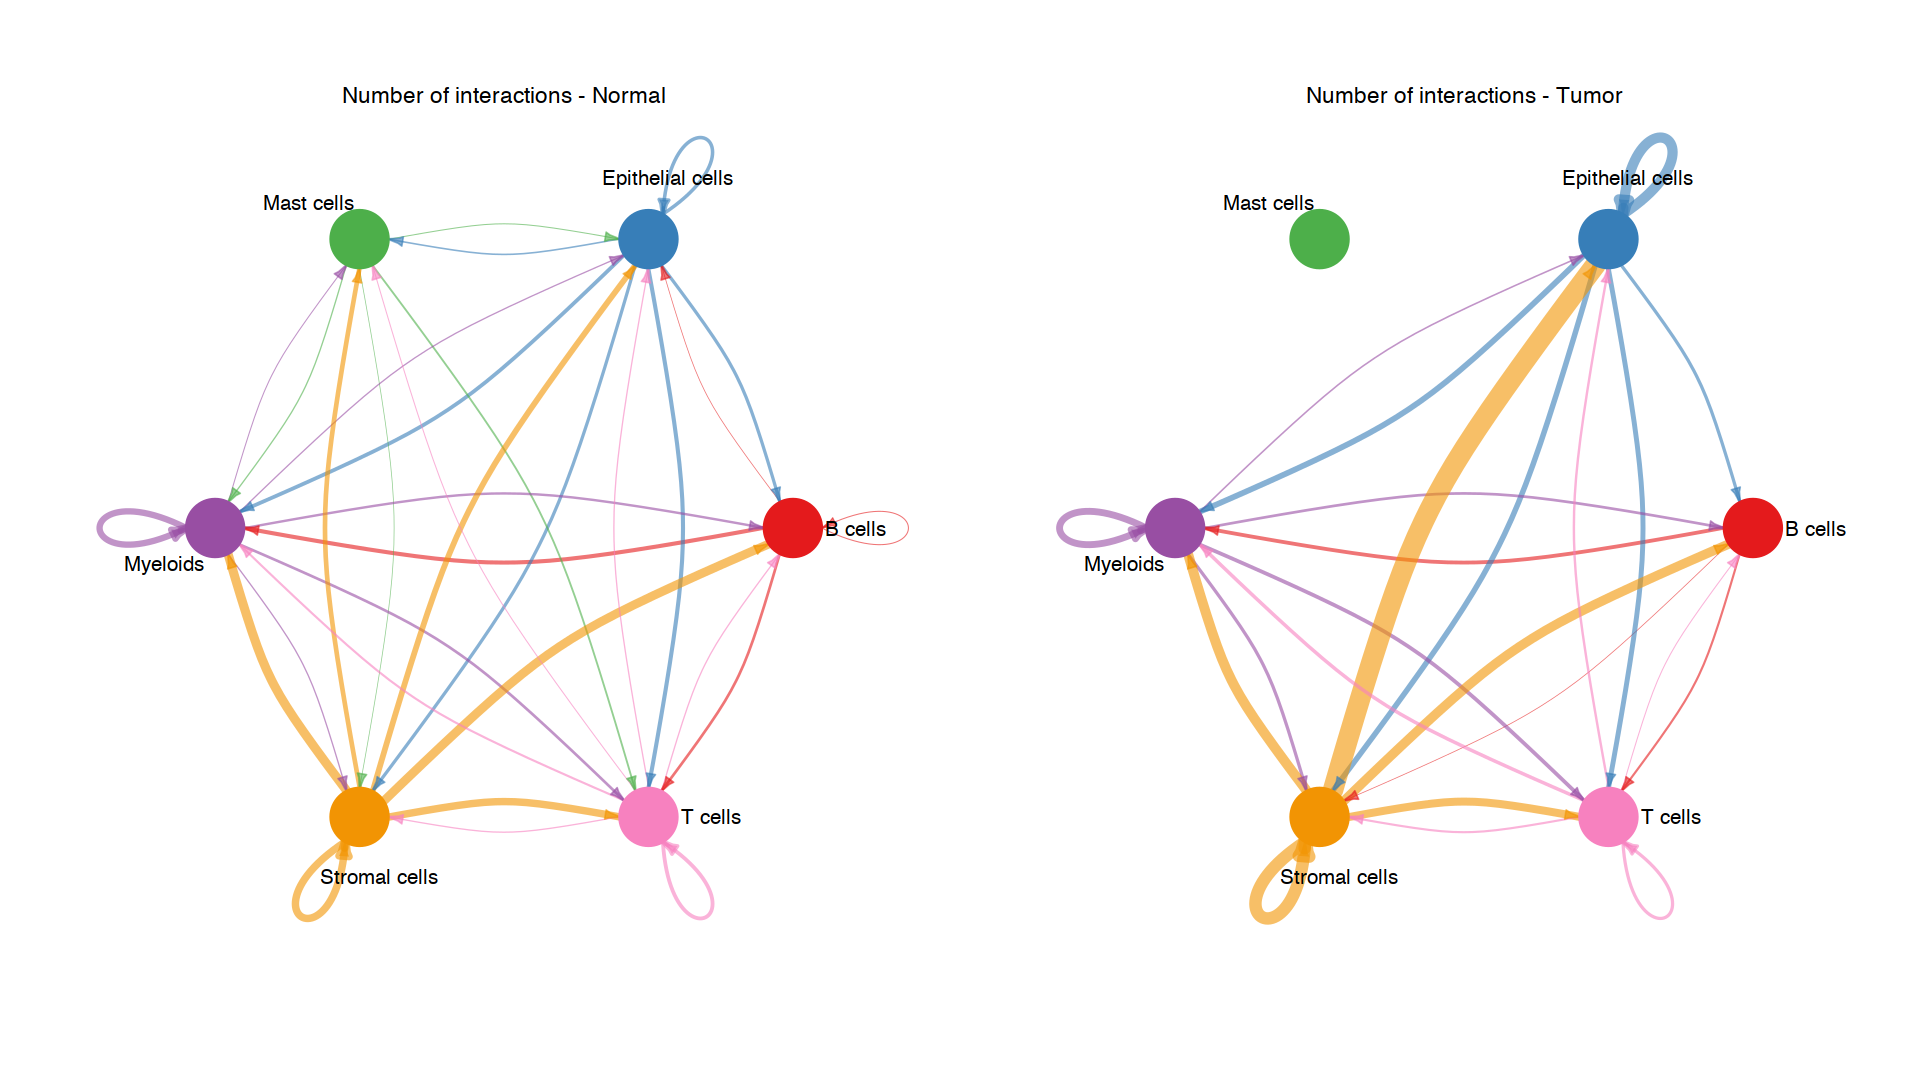

In [8]:
options(repr.plot.height = 9, repr.plot.width = 16)
weight.max <- getMaxWeight(object.list, attribute = c("idents","count"))
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_circle(object.list[[i]]@net$count, weight.scale = T, label.edge= F, edge.weight.max = weight.max[2], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}

Major sources (senders) and targets (receivers)

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



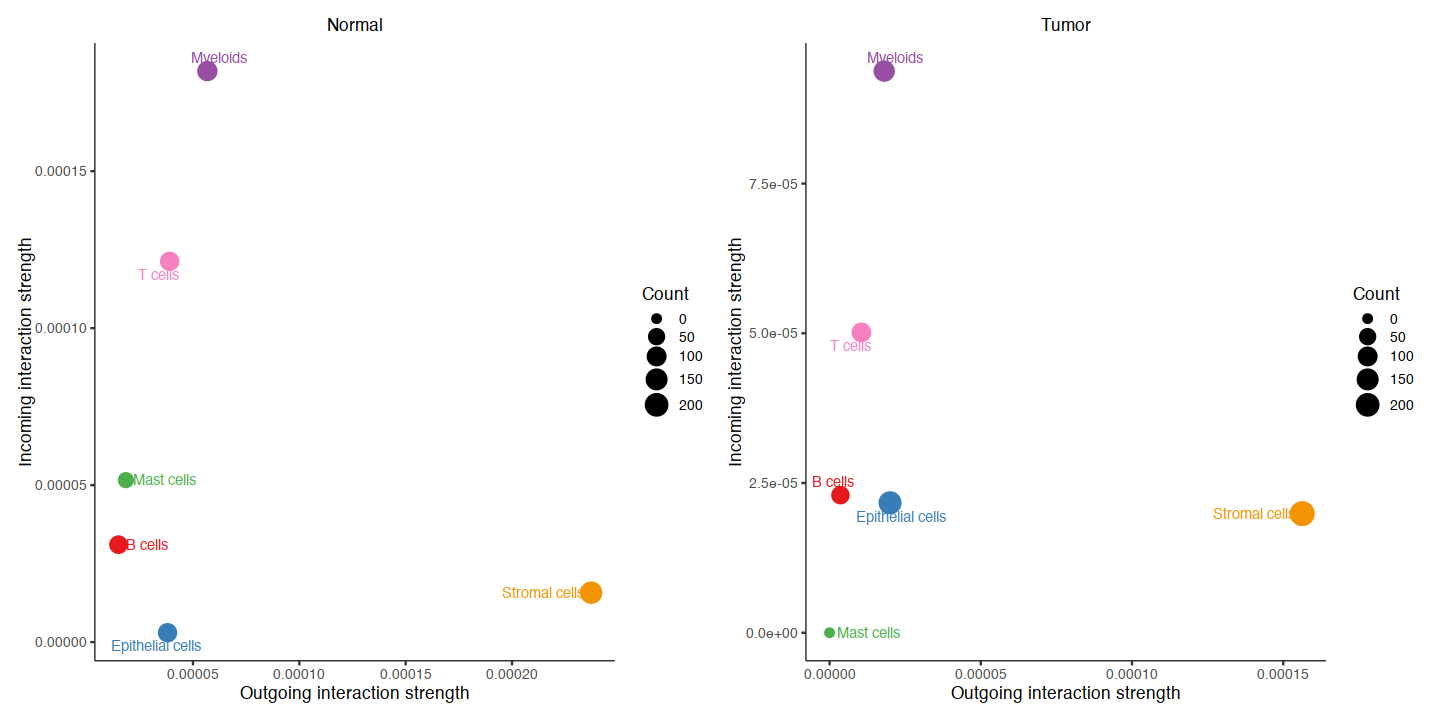

In [13]:
options(repr.plot.height = 6, repr.plot.width = 12)
# Compute total interactions
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
patchwork::wrap_plots(plots = gg)

### Comparing specific signaling pathways and ligand-receptor pairs

Comparison of pathway embeddings

In [15]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")
cellchat <- netClustering(cellchat, type = "functional")

Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 
Classification learning of the signaling networks for datasets 1 2 


2D visualization of signaling networks from datasets 1 2 


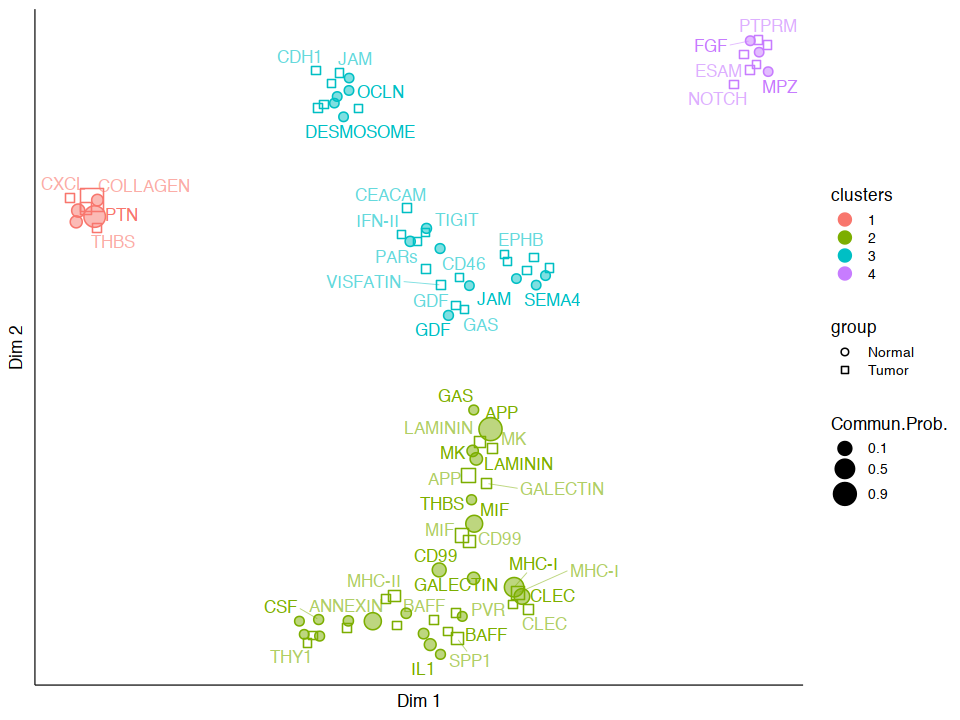

In [17]:
# Visualization in 2D-space
options(repr.plot.height = 6, repr.plot.width = 8)
netVisual_embeddingPairwise(cellchat, type = "functional", label.size = 3.5)

In [20]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "structural")
cellchat <- netEmbedding(cellchat, type = "structural")
cellchat <- netClustering(cellchat, type = "structural")

Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 
Classification learning of the signaling networks for datasets 1 2 


2D visualization of signaling networks from datasets 1 2 


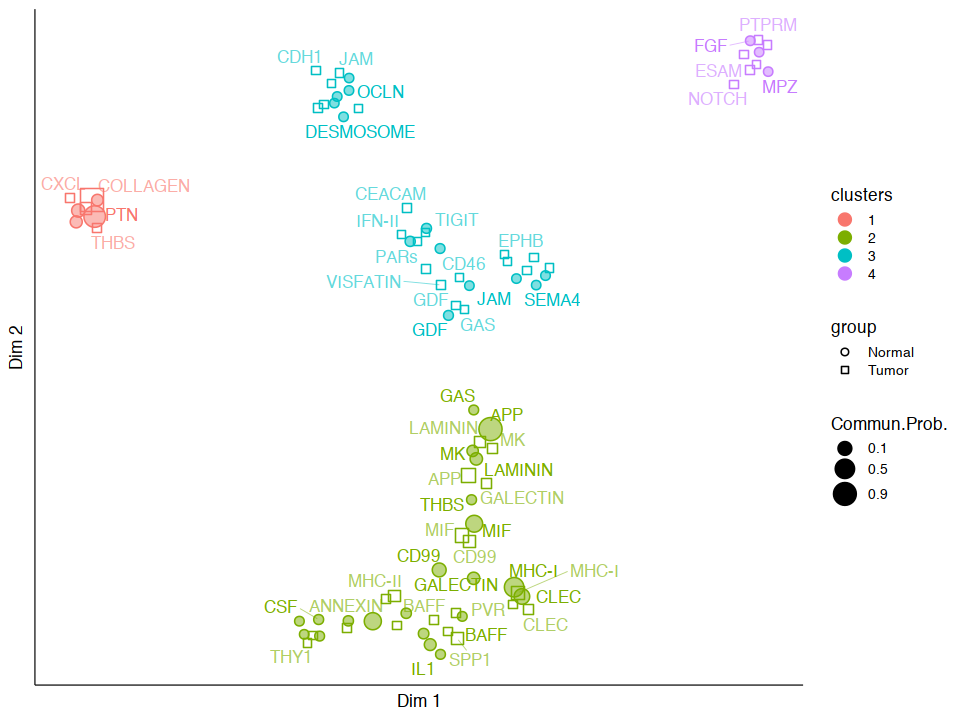

In [21]:
# Visualization in 2D-space
options(repr.plot.height = 6, repr.plot.width = 8)
netVisual_embeddingPairwise(cellchat, type = "functional", label.size = 3.5)

Pathway distance

Compute the distance of signaling networks between datasets 1 2 


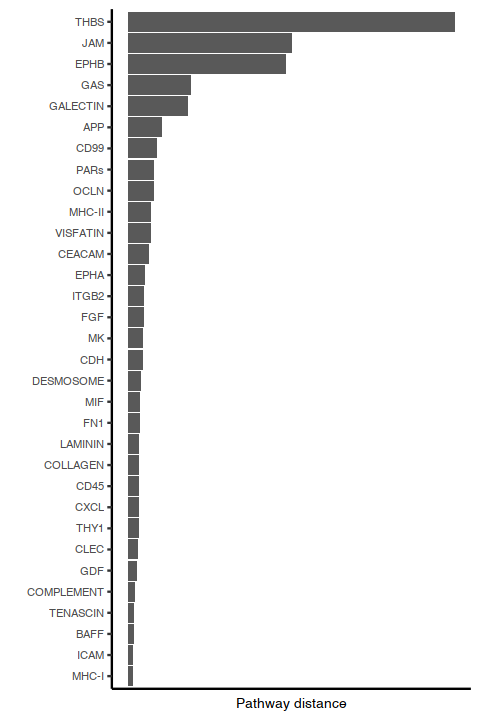

In [22]:
options(repr.plot.height = 6, repr.plot.width = 4)
rankSimilarity(cellchat, type = "functional")

Identify and visualize the conserved and context-specific signaling pathways

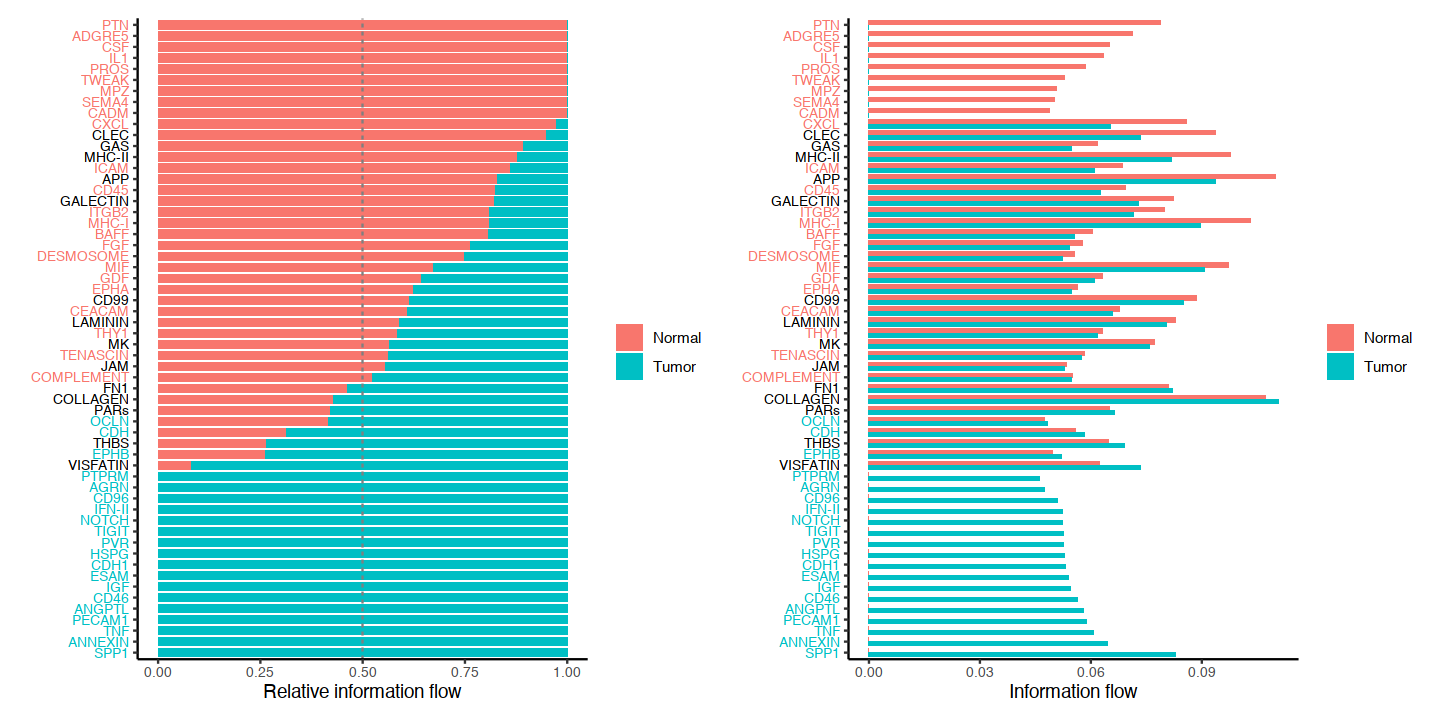

In [23]:
options(repr.plot.height = 6, repr.plot.width = 12)
gg1 <- rankNet(cellchat, mode = "comparison", stacked = T, do.stat = TRUE)
gg2 <- rankNet(cellchat, mode = "comparison", stacked = F, do.stat = TRUE)
gg1 + gg2

Up- and down- regulated ligand-receptor pairs

Comparing communications on a merged object 




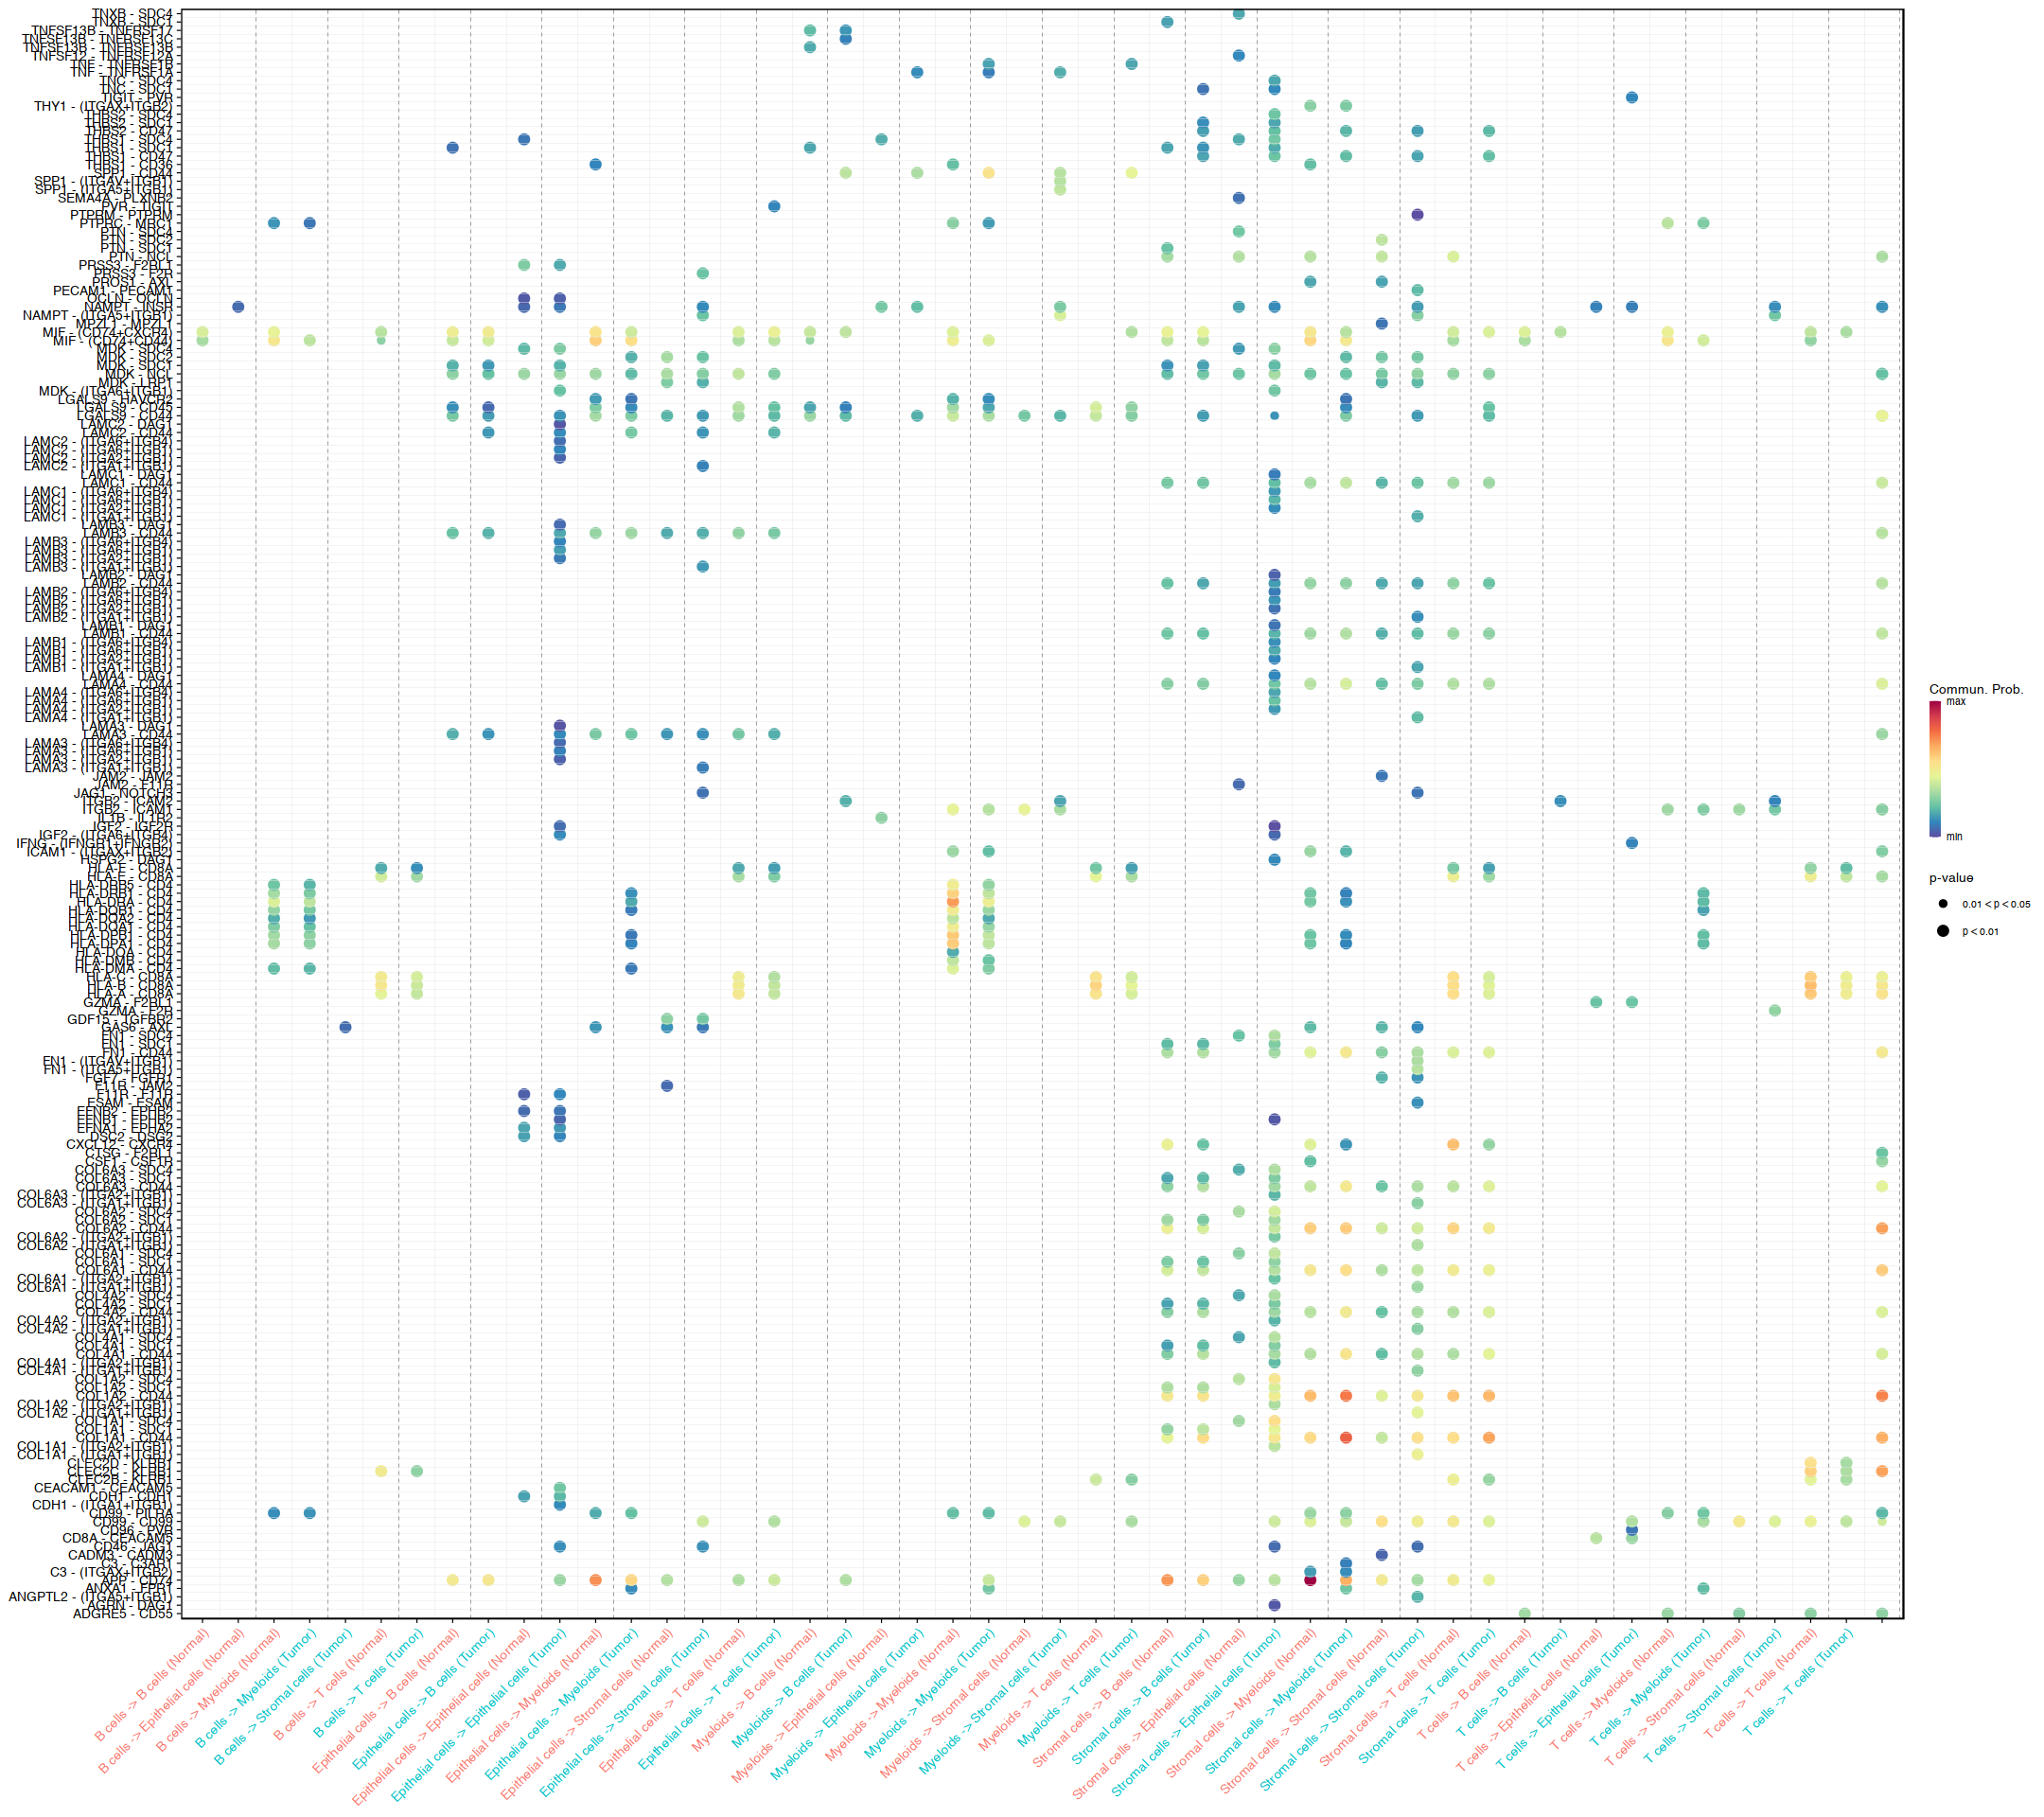

In [24]:
options(repr.plot.height = 16, repr.plot.width = 18)
netVisual_bubble(cellchat, 
                 #sources.use = 4, 
                 #targets.use = c(5:11),  
                 comparison = c(1, 2), 
                 angle.x = 45
                )

Comparing communications on a merged object 


Comparing communications on a merged object 




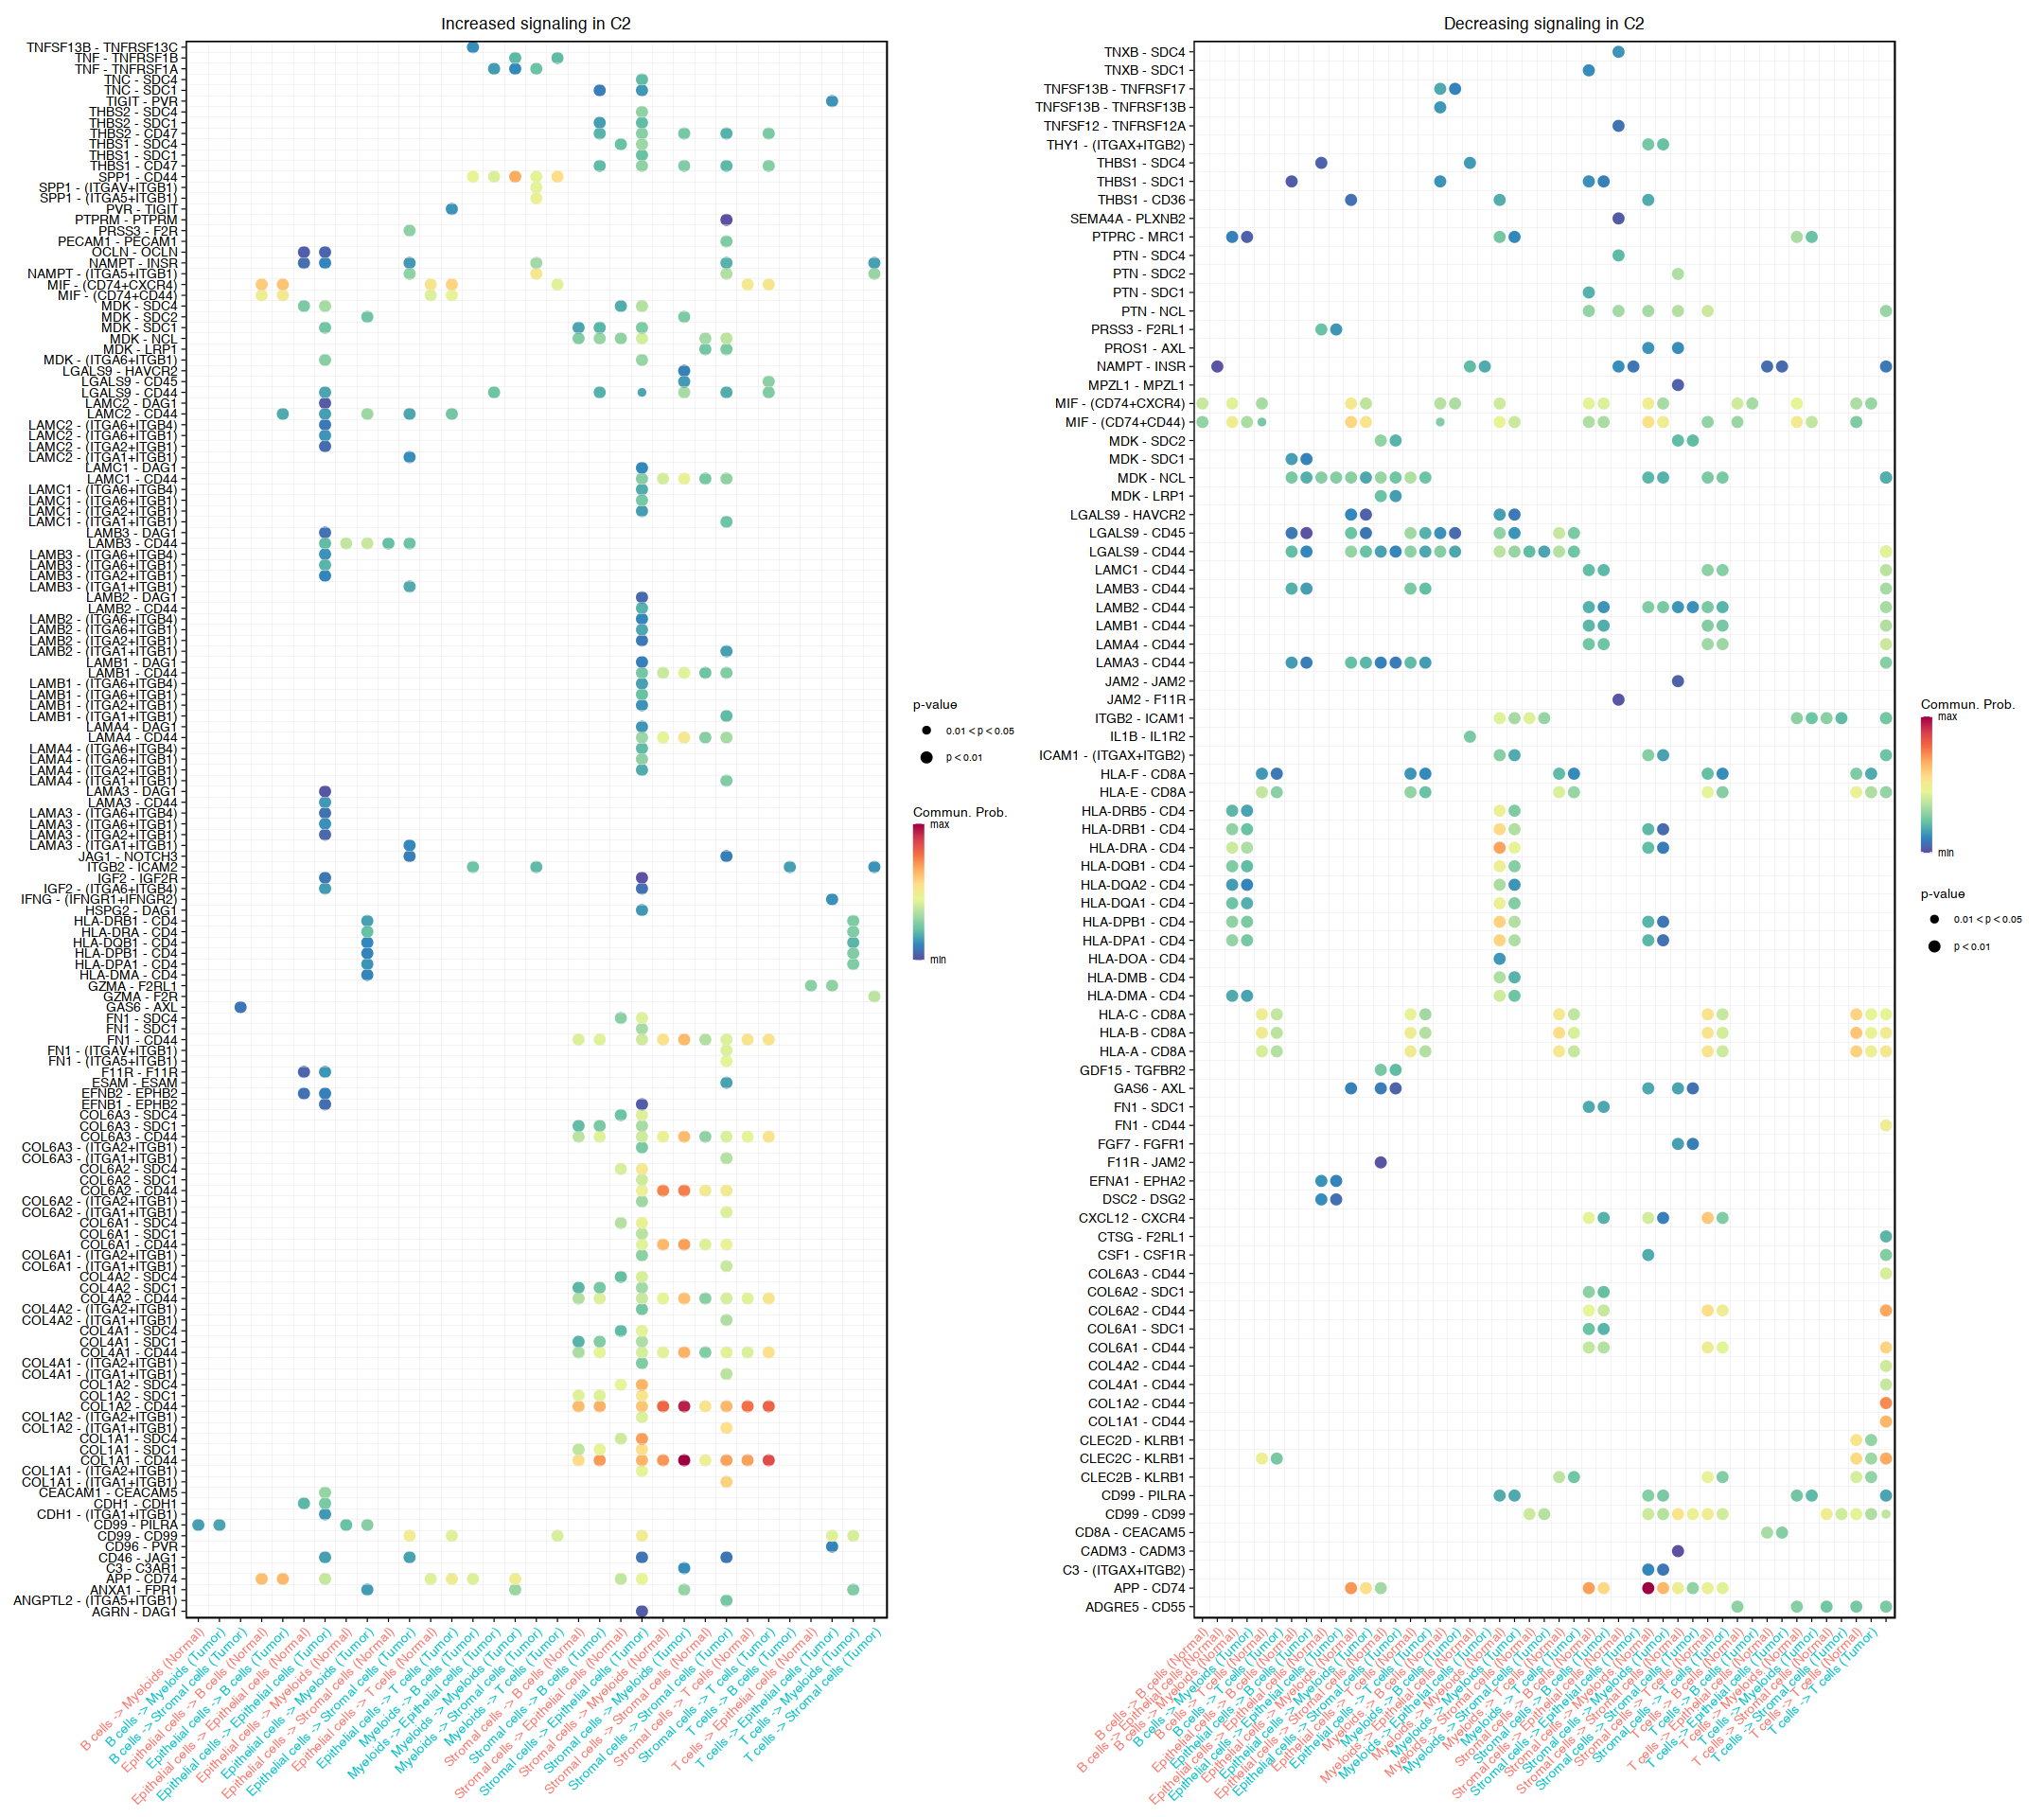

In [29]:
options(repr.plot.height = 16, repr.plot.width = 18)
g1 <- netVisual_bubble(cellchat, 
                       #sources.use = 4, 
                       #targets.use = c(5:11),  
                       comparison = c(1, 2), 
                       angle.x = 45,
                       max.dataset = 2, 
                       title.name = "Increased signaling in C2", # C2 = Condition 2
                       remove.isolate = T
                      )
g2 <- netVisual_bubble(cellchat, 
                       #sources.use = 4, 
                       #targets.use = c(5:11),  
                       comparison = c(1, 2), 
                       angle.x = 45,
                       max.dataset = 1, 
                       title.name = "Decreasing signaling in C2", 
                       remove.isolate = T
                      )

g1 + g2

## Export CellChat merged-object

In [27]:
saveRDS(cellchat, file = "cellchat_normal_vs_tumor.rds")